<a href="https://colab.research.google.com/github/Suman5501/AI-lab-assignment/blob/main/11_CSL5402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB-11 Assignment (CSL5402)
---

1. Read wines.csv dataset (shared with the named “wines.csv” in the file section inside the dataset folder) using PCA.

2. Read and analyze the wines.csv dataset (shared with the named “wines.csv” in the file section inside the dataset folder) using PCA calculate the accuracy and F1 score.

In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
#Reading the dataset..
df=pd.read_csv('/content/wines.csv')

In [ ]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Checking if there is any existing null value or not
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [ ]:
#Count the unique values
df["Wine"].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

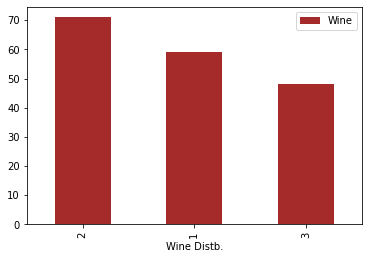

In [ ]:
df["Wine"].value_counts().plot.bar(color='brown')
plt.xlabel("Wine Distb.")
plt.legend()

In [ ]:
#Checking the dimensions
df.shape

(178, 14)

In [ ]:
#Separating dependent and independent variable.
X = df.iloc[:, 1:13].values
y = df.iloc[:, 0].values

In [ ]:
print(X)

[[14.23  1.71  2.43 ...  5.64  1.04  3.92]
 [13.2   1.78  2.14 ...  4.38  1.05  3.4 ]
 [13.16  2.36  2.67 ...  5.68  1.03  3.17]
 ...
 [13.27  4.28  2.26 ... 10.2   0.59  1.56]
 [13.17  2.59  2.37 ...  9.3   0.6   1.62]
 [14.13  4.1   2.74 ...  9.2   0.61  1.6 ]]


In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-1.2286132  -0.73008877  0.23407848 ... -0.6555786   0.41487394
  -0.00644049]
 [ 0.35896902 -0.54004646 -0.7720794  ... -0.50580955  0.28495899
   0.15984133]
 [-0.0928813   0.44636363  1.24023636 ... -0.22766703 -0.7976656
  -0.47757233]
 ...
 [-0.77676287 -1.12827266 -0.91581624 ... -0.27045819  0.37156896
   0.15984133]
 [-1.88807042  1.28797958 -1.92197412 ... -0.9551167  -0.88427557
   0.21526861]
 [-0.87446024  0.4644629  -0.48460572 ... -1.27605037  0.84792378
   0.89425273]]


In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The accuracy of logistic regression is: ",accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 1 15  1]
 [ 0  0  9]]
The accuracy of logistic regression is:  0.9444444444444444


In [ ]:
f1_score(y_test, y_pred,average='weighted')

0.9441007031467559

In [ ]:
#fitiing Randomforest into dataset
from sklearn.ensemble import RandomForestClassifier

rdf_c = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred = rdf_c.predict(X_test)
rdf_cm = confusion_matrix(y_test,rdf_pred)
print(rdf_cm)

[[10  0  0]
 [ 1 15  1]
 [ 1  0  8]]


In [ ]:
print(rdf_cm)

[[10  0  0]
 [ 1 15  1]
 [ 1  0  8]]


In [ ]:
print("The accuracy of RandomForestClassifier is:",accuracy_score(rdf_pred,y_test))

The accuracy of RandomForestClassifier is: 0.9166666666666666


In [ ]:
print("f1_score of RandomForestClassifier is:")
f1_score(y_test, rdf_pred,average='weighted')

f1_score of RandomForestClassifier is:


0.9174558080808082